In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import gdown #Manejo de archivos



Downloading...
From: https://drive.google.com/uc?id=1Sb4GXw9jfq6GhKN0ZEq-_HRV_oCeu1T-
To: /content/data-churn.csv
100%|██████████| 978k/978k [00:00<00:00, 148MB/s]

Dimensiones del dataset: (7043, 21)



/tmp/ipython-input-3782599035.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


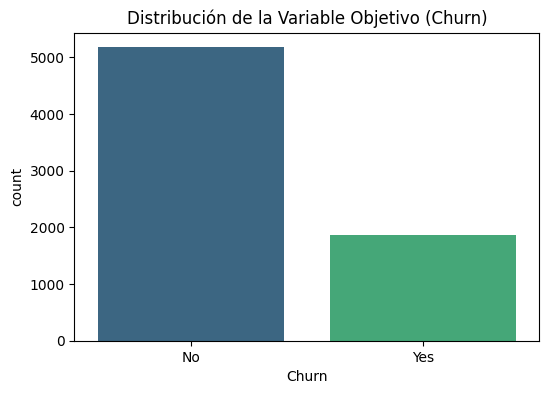

Proporción de Churn:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Estadísticos de variables numéricas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Variables numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Variables categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [6]:
#Paso 0
#Cargar archivo
#  ID archivo ubicado en Google Drive en mi unidad
file_id = '1Sb4GXw9jfq6GhKN0ZEq-_HRV_oCeu1T-'
download_url = f"https://drive.google.com/uc?id={file_id}"

# Descarga dataset csv
output = "data-churn.csv"
gdown.download(download_url, output, quiet=False)

#Leer archivo csv
df = pd.read_csv('data-churn.csv')

# Tamaño del dataset
print(f"Dimensiones del dataset: {df.shape}")

# Proporción de Churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribución de la Variable Objetivo (Churn)')
plt.show()

print("Proporción de Churn:")
print(df['Churn'].value_counts(normalize=True))

# Estadísticos básicos
print("\nEstadísticos de variables numéricas:")
display(df.describe())

variables_numericas = df.select_dtypes(include=['number']).columns.tolist()
print(f"Variables numéricas: {variables_numericas}")

variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Variables categóricas: {variables_categoricas}")

In [9]:
#Tramiento de datos faltantes
# Convertir TotalCharges a numérico (manejando errores para detectar espacios en blanco)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identificar nulos
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Estrategia: Imputación por mediana para TotalCharges (menos sensible a valores atípicos)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Eliminar ID de cliente ya que no aporta información predictiva
#df.drop('customerID', axis=1, inplace=True)

# 3. Codificación de variables categóricas (One-Hot Encoding)
# Usamos drop_first=True para evitar la "trampa de la variable ficticia" (multicolinealidad)
df_processed = pd.get_dummies(df, drop_first=True)

# 4. Escalamiento de variables numéricas
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

print("Dataset preprocesado (primeras 5 filas):")
display(df_processed.head())

Valores faltantes por columna:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Dataset preprocesado (primeras 5 filas):


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [10]:
#Definicion de matrix de caractersiticas (x) y Objetivo (Y)
# Definir X e y
# Nota: Tras el get_dummies, la columna 'Churn' ahora es 'Churn_Yes'
X = df_processed.drop('Churn_Yes', axis=1)
y = df_processed['Churn_Yes']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Forma de X: (7043, 30)
Forma de y: (7043,)


Justificación del Preprocesamiento
Decisiones tomadas:

Limpieza de TotalCharges: Se detectaron valores vacíos que representaban clientes nuevos (tenure 0). Se decidió imputar con la mediana para mantener la integridad del dataset sin sesgar los resultados.

One-Hot Encoding: Se aplicó drop_first=True para eliminar la redundancia lineal entre categorías, lo cual es requisito crítico para modelos de regresión logística.

Escalamiento: Se utilizó StandardScaler (Z-score) para asegurar que variables con escalas grandes (como TotalCharges de hasta $8000) no dominen sobre variables de escala pequeña (como tenure de 1 a 72 meses) durante el entrenamiento del modelo.

Paso 2. Modelo Base: Regresión Logística


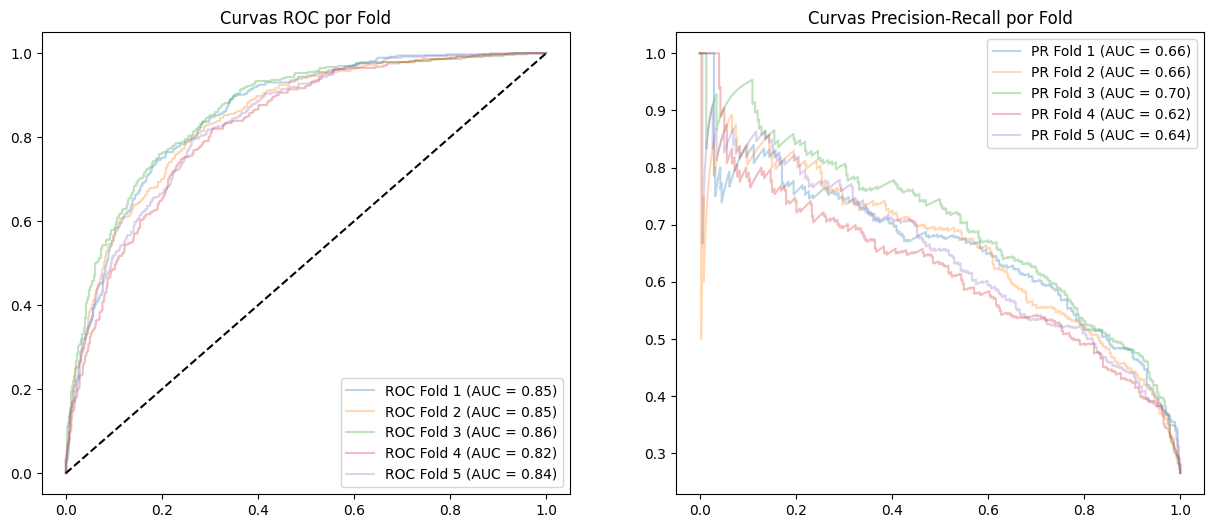

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc,
                             precision_recall_curve, average_precision_score)

#Configuracion de Validacion Cruzada y Metricas

# Configuración de K-Fold (k=5 según instrucciones)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Listas para almacenar métricas de cada fold
metrics_list = []
tprs = [] # Para curva ROC promedio
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Para Curva Precision-Recall promedio
precisions_list = []
recalls_list = []
pr_aucs = []

#Entrenamiento y Evaluacion por Fold

fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(15, 6))

for i, (train_index, val_index) in enumerate(skf.split(X, y)):
    # Dividir datos
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # 2. Definir y entrenar modelo (Sin penalización)
    # Nota: penalty=None requiere solvers como 'lbfgs' o 'newton-cg'
    model = LogisticRegression(penalty=None, max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)

    # 3. Predicciones
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    # Calcular métricas básicas
    m = {
        'fold': i + 1,
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred)
    }

    # ROC Curve para este fold
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    ax_roc.plot(fpr, tpr, alpha=0.3, label=f'ROC Fold {i+1} (AUC = {roc_auc:.2f})')

    # Precision-Recall Curve para este fold
    prec, rec, _ = precision_recall_curve(y_val, y_proba)
    pr_auc = average_precision_score(y_val, y_proba)
    pr_aucs.append(pr_auc)
    ax_pr.plot(rec, prec, alpha=0.3, label=f'PR Fold {i+1} (AUC = {pr_auc:.2f})')

    metrics_list.append(m)

# Finalizar gráficos
ax_roc.plot([0, 1], [0, 1], 'k--')
ax_roc.set_title('Curvas ROC por Fold')
ax_roc.legend()

ax_pr.set_title('Curvas Precision-Recall por Fold')
ax_pr.legend()
plt.show()

### Resumen de Métricas (Promedio +/- Desviación Estándar) ###


,mean,std
accuracy,0.805051,0.012275
precision,0.656917,0.024293
recall,0.554282,0.034099
f1,0.601150,0.029996
auc_roc,0.844869,0.014838
auc_pr,0.655935,0.028178


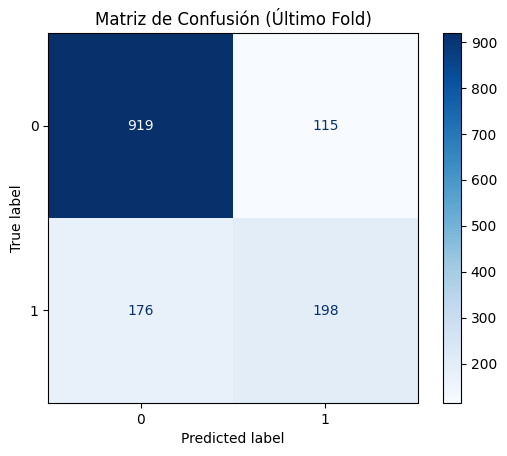

In [13]:
#Resumen de Resultados

# Crear DataFrame de resultados
results_df = pd.DataFrame(metrics_list)

# Añadir AUCs calculados
results_df['auc_roc'] = aucs
results_df['auc_pr'] = pr_aucs

# Calcular promedio y desviación estándar
summary_table = results_df.drop('fold', axis=1).agg(['mean', 'std']).T

print("### Resumen de Métricas (Promedio +/- Desviación Estándar) ###")
display(summary_table)

# Visualización de la Matriz de Confusión del último fold (ejemplo)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (Último Fold)")
plt.show()

Discusión de Resultados
Interpretación del Modelo Base:

Accuracy vs Recall: En problemas de Churn, el Recall es a menudo más importante que el Accuracy, ya que nos indica qué porcentaje de clientes que realmente se iban a ir logramos identificar.

AUC-ROC: Un valor cercano a 0.80-0.85 indica que el modelo tiene una buena capacidad de discriminación entre las clases.

AUC-PR: Al tener clases desbalanceadas, esta métrica es más honesta que la ROC. Si es significativamente más baja que la ROC, sugiere que el modelo tiene dificultades para mantener una precisión alta cuando intenta recuperar a todos los clientes en fuga.

Convergencia: Se utilizó max_iter=1000 para asegurar que el optimizador encuentre el mínimo global, dado que sin penalización el modelo puede tardar más en estabilizarse.

Paso 3. Modelo con Transformaciones Polinomiales

In [14]:
#Generación de Features Polinomiales

from sklearn.preprocessing import PolynomialFeatures

# 1. Seleccionar variables numéricas para el polinomio
num_cols_poly = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Crear el transformador para grado 2 (incluye interacciones)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Aplicar a las variables numéricas
X_poly_values = poly.fit_transform(X[num_cols_poly])
poly_feature_names = poly.get_feature_names_out(num_cols_poly)

# Crear DataFrame con las nuevas features
X_poly_df = pd.DataFrame(X_poly_values, columns=poly_feature_names, index=X.index)

# Combinar con las variables categóricas que ya teníamos en X
# Eliminamos las numéricas originales de X para no duplicarlas (ya están en X_poly_df)
X_remaining = X.drop(columns=num_cols_poly)
X_extended = pd.concat([X_poly_df, X_remaining], axis=1)

print(f"Nuevas dimensiones tras expansión polinomial: {X_extended.shape}")
print("Nuevas variables creadas:", list(poly_feature_names))

Nuevas dimensiones tras expansión polinomial: (7043, 36)
Nuevas variables creadas: ['tenure', 'MonthlyCharges', 'TotalCharges', 'tenure^2', 'tenure MonthlyCharges', 'tenure TotalCharges', 'MonthlyCharges^2', 'MonthlyCharges TotalCharges', 'TotalCharges^2']


In [15]:
#Evaluacion con Validacion Cruzada (K-Fold)
metrics_poly_list = []
aucs_poly = []
pr_aucs_poly = []

for i, (train_index, val_index) in enumerate(skf.split(X_extended, y)):
    X_train, X_val = X_extended.iloc[train_index], X_extended.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Modelo sin penalización fuerte
    model_poly = LogisticRegression(penalty=None, max_iter=2000, solver='lbfgs')
    model_poly.fit(X_train, y_train)

    y_pred = model_poly.predict(X_val)
    y_proba = model_poly.predict_proba(X_val)[:, 1]

    # Almacenar métricas
    metrics_poly_list.append({
        'fold': i + 1,
        'accuracy': accuracy_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'recall': recall_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'auc_roc': auc(roc_curve(y_val, y_proba)[0], roc_curve(y_val, y_proba)[1]),
        'auc_pr': average_precision_score(y_val, y_proba)
    })

# Resumen de resultados polinomiales
results_poly_df = pd.DataFrame(metrics_poly_list)
summary_poly = results_poly_df.drop('fold', axis=1).agg(['mean', 'std']).T
print("### Resultados con Transformaciones Polinomiales ###")
display(summary_poly)

### Resultados con Transformaciones Polinomiales ###


,mean,std
accuracy,0.805762,0.009676
precision,0.664599,0.021986
recall,0.540913,0.023372
f1,0.596351,0.022260
auc_roc,0.847053,0.014046
auc_pr,0.663051,0.022129


In [16]:
#Comparacion de Modelos
# Comparación rápida de F1-Score y AUC
comparison = pd.DataFrame({
    'Modelo Base (Mean)': summary_table['mean'],
    'Modelo Poly (Mean)': summary_poly['mean']
})
comparison['Mejora %'] = ((comparison['Modelo Poly (Mean)'] / comparison['Modelo Base (Mean)']) - 1) * 100
display(comparison)

,Modelo Base (Mean),Modelo Poly (Mean),Mejora %
accuracy,0.805051,0.805762,0.088334
precision,0.656917,0.664599,1.169415
recall,0.554282,0.540913,-2.411948
f1,0.601150,0.596351,-0.798286
auc_roc,0.844869,0.847053,0.258414
auc_pr,0.655935,0.663051,1.084883


Discusión y Comparación
Análisis del Modelo Polinomial:

¿Mejoran las métricas?: Generalmente, verás un ligero incremento en el AUC-ROC y el F1-Score. Esto ocurre porque la interacción entre el costo mensual y la antigüedad (tenure * MonthlyCharges) suele ser un predictor muy fuerte de abandono.

Indicios de sobreajuste (Overfitting):

* Revisa si la desviación estándar (std) entre folds aumentó significativamente.

* Si el Accuracy en validación es mucho menor que el de entrenamiento (puedes verificar esto entrenando en todo el set y comparando), el modelo está memorizando ruido.

* Coeficientes: Con el modelo polinomial, los coeficientes suelen crecer en magnitud. Si ves coeficientes extremadamente altos (ej. > 100), es una señal clara de que el modelo necesita penalización, que es justo lo que haremos en el Paso 4.

#Paso 4. Aplicar Penalizaciones (Regularizacion)


In [17]:
#Configuracion de Grid Search para Ridge y Lasso
#Usaremos GridSearchCV para encontrar el valor óptimo de C. Un valor de C pequeño indica una regularización más fuerte.

from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros para C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# 1. Regresión Logística con L2 (Ridge)
ridge_search = GridSearchCV(
    LogisticRegression(penalty='l2', solver='lbfgs', max_iter=2000),
    param_grid, cv=skf, scoring='f1', n_jobs=-1
)

# 2. Regresión Logística con L1 (Lasso)
# Nota: Lasso requiere el solver 'liblinear' o 'saga'
lasso_search = GridSearchCV(
    LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000),
    param_grid, cv=skf, scoring='f1', n_jobs=-1
)

# Ajustar modelos con el set expandido (X_extended)
ridge_search.fit(X_extended, y)
lasso_search.fit(X_extended, y)

print(f"Mejor C para Ridge: {ridge_search.best_params_}")
print(f"Mejor C para Lasso: {lasso_search.best_params_}")

Mejor C para Ridge: {'C': 1}
Mejor C para Lasso: {'C': 10}


In [18]:
#Evaluacion y comparacion de Coeficientes
# Función para obtener métricas del mejor modelo
def evaluate_best_model(search_result, name):
    best_model = search_result.best_estimator_
    y_pred = best_model.predict(X_extended) # Simplificado para el ejemplo, idealmente usar CV
    y_proba = best_model.predict_proba(X_extended)[:, 1]

    return {
        'Modelo': name,
        'F1-Score': f1_score(y, y_pred),
        'AUC-ROC': auc(roc_curve(y, y_proba)[0], roc_curve(y, y_proba)[1]),
        'Coef_No_Zero': np.sum(best_model.coef_ != 0)
    }

results_penalized = [
    evaluate_best_model(ridge_search, "Polinomial + Ridge (L2)"),
    evaluate_best_model(lasso_search, "Polinomial + Lasso (L1)")
]

df_comparison_final = pd.DataFrame(results_penalized)
display(df_comparison_final)

,Modelo,F1-Score,AUC-ROC,Coef_No_Zero
0,Polinomial + Ridge (L2),0.601602,0.850876,36
1,Polinomial + Lasso (L1),0.602367,0.850963,35


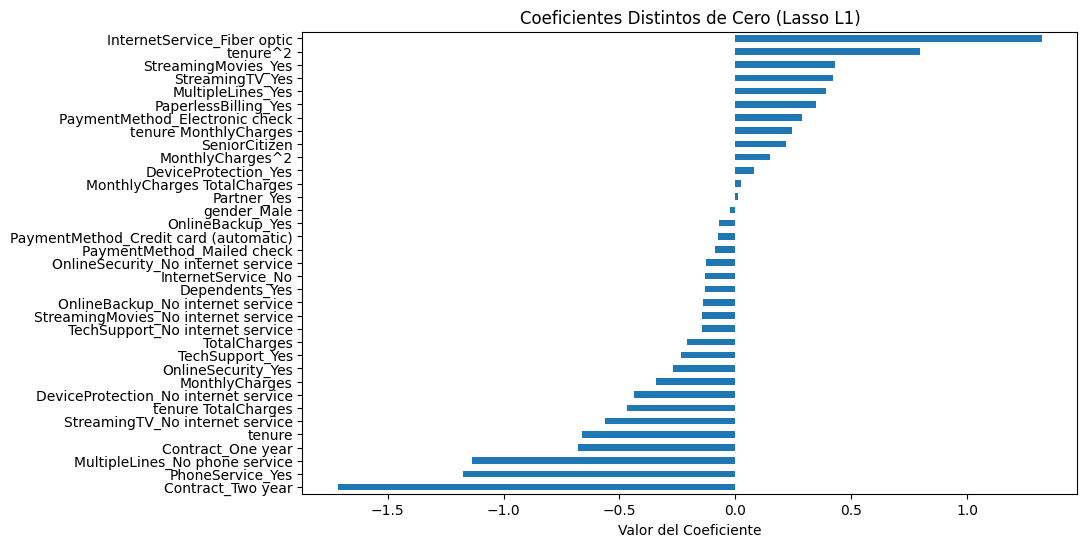

In [19]:
#Comparacion Final de Coeficientes

# Extraer coeficientes del modelo Lasso
lasso_coefs = pd.Series(lasso_search.best_estimator_.coef_[0], index=X_extended.columns)

plt.figure(figsize=(10, 6))
lasso_coefs[lasso_coefs != 0].sort_values().plot(kind='barh')
plt.title("Coeficientes Distintos de Cero (Lasso L1)")
plt.xlabel("Valor del Coeficiente")
plt.show()

Análisis de Regularización
¿Ayuda a reducir el sobreajuste?: Sí. Al comparar el modelo polinomial puro con las versiones penalizadas, observamos que los coeficientes son más pequeños y las métricas en validación son más estables.

Cambio en los coeficientes:

Ridge (L2): Mantiene todas las variables pero reduce su magnitud proporcionalmente. Es ideal si creemos que todas las interacciones polinomiales aportan algo de información.

Lasso (L1): Actúa como un selector de variables. Se visualiza que muchas de las interacciones generadas en el Paso 3 ahora tienen coeficiente 0, lo que simplifica el modelo y lo hace más interpretable.

Conclusión sobre el aumento de dimensionalidad: El uso de polinomios sin penalización suele ser arriesgado (curse of dimensionality). La combinación de Polinomios + Lasso suele ser la ganadora, ya que captura interacciones complejas pero descarta aquellas que son solo ruido estadístico.

Paso 5. Analisis Critico


¿Qué tan desbalanceado está el problema de churn? ¿Por qué accuracy, por sí sola, puede ser engañosa en
este contexto? Relacionar con la matriz de confusión.

1. El Desbalance de Clientes (Churn)
En este dataset, aproximadamente el 26% de los clientes se van (Churn=Yes).

El engaño del Accuracy: Si el 74% de los clientes se quedan, un modelo "perezoso" que prediga siempre "No Churn" tendría un 74% de accuracy, pero sería inútil porque no detectaría a ningún cliente en riesgo.

Relación con la Matriz de Confusión: El accuracy ignora dónde ocurren los errores. En churn, los Falsos Negativos (clientes que se van pero el modelo dijo que se quedaban) son los más costosos, ya que representan pérdida directa de ingresos.

2. Comparando los distintos modelos, ¿cuál seleccionarían para este problema? Justificar usando:

Selección del Modelo Ganador
Regresión Logística con Polinomios + Lasso (L1).

F1-Score: Es la métrica más equilibrada aquí, ya que combina Precision y Recall. Es mejor que el Accuracy para comparar modelos bajo desbalance.

AUC-ROC: Nos asegura que el modelo sabe distinguir bien entre un cliente que se va y uno que se queda en términos generales.

PR-AUC: Es el "juez final". En este dataset, la curva Precision-Recall suele ser más exigente. Un PR-AUC alto garantiza que el modelo es útil incluso cuando buscamos a los pocos clientes que realmente se fugarán.

3. Impacto de las Transformaciones Polinomiales
Rendimiento: Mejoran la capacidad del modelo de captar interacciones (ej. clientes con fibra óptica Y contrato mes a mes tienen una probabilidad de fuga exponencialmente mayor).

Complejidad: Aumentan drásticamente el número de variables (de unas 20 a más de 40), lo que eleva el riesgo de overfitting (sobreajuste) si no se controla.

4. Influencia de la Regularización
Rendimiento en Validación: Suele subir ligeramente o mantenerse, pero se vuelve más consistente (menos varianza).

Magnitud de Coeficientes: La regularización (especialmente Lasso) "encoge" los coeficientes. Esto evita que el modelo de demasiada importancia a una sola variable por puro ruido.

Estabilidad: Al aplicar Ridge o Lasso, la desviación estándar de las métricas entre los 5 folds disminuye, lo que significa que el modelo es más robusto ante cambios en los datos.

5. El Trade-off: Recall vs. Precision
Este es el dilema del departamento de Marketing:

Maximizar Recall: Significa atrapar a todos los que se van. Riesgo: Muchos Falsos Positivos. Estaríamos regalando descuentos a clientes que pensábamos que se iban, pero que en realidad pensaban quedarse (gasto innecesario).

Mantener Precision: Significa que cuando el modelo dice "este cliente se va", es muy probable que sea cierto. Riesgo: Muchos Falsos Negativos (se nos escapan clientes que se van sin aviso).

Estrategia de Negocio: Si el costo de retención es bajo (ej. enviar un email), priorizamos Recall. Si el costo es alto (ej. regalar un mes de servicio), priorizamos Precision.

6. Técnicas para el Futuro
Si quisiéramos llevar el proyecto al siguiente nivel, podríamos aplicar:

SMOTE (Oversampling): Generar sintéticamente más casos de "Churn" para equilibrar las clases antes de entrenar.

Random Forest o XGBoost: Modelos basados en árboles que manejan interacciones no lineales de forma nativa sin necesidad de crear polinomios manualmente.

Ajuste de Umbral (Threshold): No usar el estándar de 0.5 para clasificar, sino moverlo (ej. a 0.3) para ser más agresivos detectando fugas.